### 1. Постройте поле корреляции и сформируйте гипотезу о форме связи.

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Считаем данные из файла

In [119]:
data = pd.read_csv("data/lab4/lab4_data.csv")
data.head()

,Область,Расходы,Зарплата
0,Республика Башкортостан,461,912
1,Удмуртская Республика,524,809
2,Курганская обл.,298,748
3,Оренбургская обл.,351,847
4,Пермская обл.,624,1087


Text(0.5, 1.0, 'Поле корреляции')

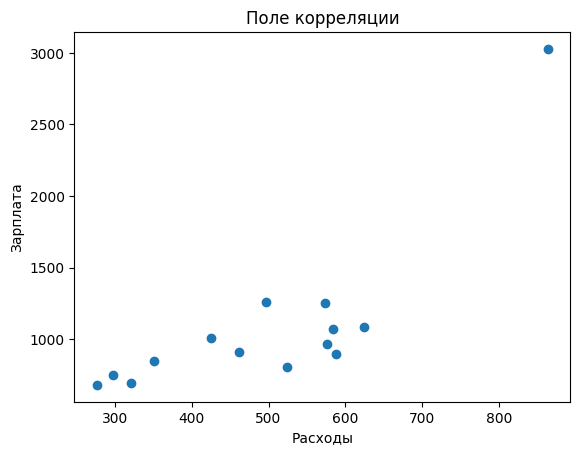

In [120]:
plt.scatter(x=data["Расходы"], y=data["Зарплата"])
plt.xlabel("Расходы")
plt.ylabel("Зарплата")
plt.title("Поле корреляции")

### Ответ

По полю корреляции можно предположить, что связь между величинами экспоненциальная, так как в начале оси Расходы график растет медленее чем в конце.

### 2. Рассчитайте параметры уравнений линейной, степенной, экспоненциальной, и гиперболической парной регрессии.

Степенная регрессия

До логорифмирования


После логорифмирования


Коэфициенты вычисляются следующим образом
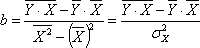


In [121]:
data["ln_Расходы"] = np.log(data["Расходы"])
data["ln_Зарплата"] = np.log(data["Зарплата"])

In [122]:
b_pow = (
    np.mean(data["ln_Зарплата"] * data["ln_Расходы"])
    - data["ln_Зарплата"].mean() * data["ln_Расходы"].mean()
) / (np.mean(data["ln_Расходы"] ** 2) - data["ln_Расходы"].mean() ** 2)
print(f"b={b_pow}")

b=0.9028529870900315


In [123]:
C = data["ln_Зарплата"].mean() - b_pow * data["ln_Расходы"].mean()
print(f"C={C}")

C=1.350840172711525


Пересчитаем реальные коэффициенты

In [124]:
a_pow = np.e**C
print(f"Степенная регресиия: y={a_pow}*x^{b_pow}")

Степенная регресиия: y=3.8606677962053833*x^0.9028529870900315


In [125]:
def my_pow_regeression(x: np.float128) -> np.float128:
    return a_pow * (x**b_pow)

Экспоненциальная регрессия

До преобразования


После преобразования



Коэфициенты вычисляются следующим образом
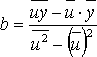


In [126]:
data["u"] = np.e ** (0.005 * data["Расходы"])

In [127]:
b_exp = (
    np.mean(data["u"] * data["Зарплата"]) - data["u"].mean() * data["Зарплата"].mean()
) / (np.mean(data["u"] ** 2) - data["u"].mean() ** 2)
print(f"b={b_exp}")

b=31.581844268934496


In [128]:
a_exp = data["Зарплата"].mean() - b_exp * data["u"].mean()
print(f"a={a_exp}")

a=563.7314850467383


In [129]:
print(f"Экспоненциальная регрессия: y={a_exp}+{b_exp}*e^(0.005*x)")

Экспоненциальная регрессия: y=563.7314850467383+31.581844268934496*e^(0.005*x)


In [130]:
def my_exp_regression(x: np.float128) -> np.float128:
    return a_exp + b_exp * np.e ** (0.005 * x)

Гиперболическая регрессия

До преобразования
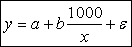

После преобразования
 


In [131]:
data["1000/Расходы"] = 1000 / data["Расходы"]

In [132]:
b_gip = (
    np.mean(data["1000/Расходы"] * data["Зарплата"])
    - data["1000/Расходы"].mean() * data["Зарплата"].mean()
) / (np.mean(data["1000/Расходы"] ** 2) - data["1000/Расходы"].mean() ** 2)
print(f"b={b_gip}")

b=-476.85305042427916


In [133]:
a_gip = data["Зарплата"].mean() - b_gip * data["1000/Расходы"].mean()
print(f"a={a_gip}")

a=2147.5678603764854


In [134]:
print(f"Гиперболическая регрессия: y={a_gip}+{b_gip}*1000/x")

Гиперболическая регрессия: y=2147.5678603764854+-476.85305042427916*1000/x


In [135]:
def my_gip_regression(x: np.float128) -> np.float128:
    return a_gip + b_gip * 1000 / x

Линейная регрессия

In [136]:
data["xy"] = data["Зарплата"] * data["Расходы"]
data["x^2"] = data["Расходы"] ** 2
data["y^2"] = data["Зарплата"] ** 2

a_linear = (data["xy"].mean() - data["Зарплата"].mean() * data["Расходы"].mean()) / (
    data["x^2"].mean() - data["Расходы"].mean() ** 2
)
b_linear = data["Зарплата"].mean() - a_linear * data["Расходы"].mean()

print(f"Коэффециент a : {a_linear}")
print(f"Кэффециент b : {b_linear}")

Коэффециент a : 2.9478989715429478
Кэффециент b : -375.23375999157156


In [137]:
print(f"Линейная регрессия: y={a_linear}*x+{b_linear}")

Линейная регрессия: y=2.9478989715429478*x+-375.23375999157156


In [138]:
def my_linear_regression(x: np.float128) -> np.float128:
    return a_linear * x + b_linear

### 3. Оцените тесноту связи с помощью показателей корреляции и детерминации.

Коэффициент детерминации вычисляется по формуле: 
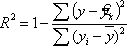

Коэффициент корреляции вычислеятся по формуле:
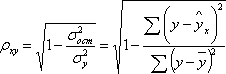

#### Коэффициенты для степенной регресии

In [139]:
data["pow_reg"] = data["Расходы"].apply(my_pow_regeression)

In [140]:
R_pow = 1 - sum((data["Зарплата"] - data["pow_reg"]) ** 2) / sum(
    (data["Зарплата"] - data["Зарплата"].mean()) ** 2
)
corr_pow = np.sqrt(R_pow)
print(f"Коэффициент детеминации для степенной регрессии : R^2={R_pow}")
print(f"Коэффициент корреляции для степеной регрессии : ρ={corr_pow}")

Коэффициент детеминации для степенной регрессии : R^2=0.5365038135277584
Коэффициент корреляции для степеной регрессии : ρ=0.7324642063116521


#### Коэфициент для экспоненциальной регрессии

In [141]:
data["exp_reg"] = data["Расходы"].apply(my_exp_regression)

In [142]:
R_exp = 1 - sum((data["Зарплата"] - data["exp_reg"]) ** 2) / sum(
    (data["Зарплата"] - data["Зарплата"].mean()) ** 2
)
corr_exp = np.sqrt(R_exp)
print(f"Коэффициент детеминации для экспоненциальной регрессии : R^2={R_exp}")
print(f"Коэффициент корреляции для экспоненциальной регрессии : ρ={corr_exp}")

Коэффициент детеминации для экспоненциальной регрессии : R^2=0.9219780571811711
Коэффициент корреляции для экспоненциальной регрессии : ρ=0.9601968845925147


#### Коэфициент для гиперболическая регрессия

In [143]:
data["gip_reg"] = data["Расходы"].apply(my_gip_regression)

In [144]:
R_gip = 1 - sum((data["Зарплата"] - data["gip_reg"]) ** 2) / sum(
    (data["Зарплата"] - data["Зарплата"].mean()) ** 2
)
corr_gip = np.sqrt(R_gip)
print(f"Коэффициент детеминации для гиперболическая регрессии : R^2={R_gip}")
print(f"Коэффициент корреляции для гиперболическая регрессии : ρ={corr_gip}")

Коэффициент детеминации для гиперболическая регрессии : R^2=0.3595159988256714
Коэффициент корреляции для гиперболическая регрессии : ρ=0.5995965300313799


#### Коэфициент для линейной регрессии

In [145]:
data["lin_reg"] = data["Расходы"].apply(my_linear_regression)

In [146]:
R_lin = 1 - sum((data["Зарплата"] - data["lin_reg"]) ** 2) / sum(
    (data["Зарплата"] - data["Зарплата"].mean()) ** 2
)
corr_lin = np.sqrt(R_lin)
print(f"Коэффициент детеминации для линейной регрессии : R^2={R_lin}")
print(f"Коэффициент корреляции для линейной регрессии : ρ={corr_lin}")

Коэффициент детеминации для линейной регрессии : R^2=0.6320943151763125
Коэффициент корреляции для линейной регрессии : ρ=0.7950435932553086


### 4. Дайте с помощью коэффициента эластичности сравнительную оценку силы связи фактора с результатом.

Средний коэффициент эластичности равен: 
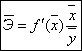

#### Коэффициент эластичночти для степенной регрессии
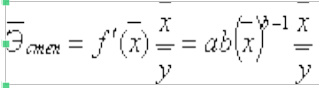

In [148]:
pow_elastic_coef = (
    a_pow
    * b_pow
    * ((data["Расходы"].mean()) ** (b_pow - 1))
    * data["Расходы"].mean()
    / data["Зарплата"].mean()
)
print(f"Коэффициент элластичности для степенной регресии: {pow_elastic_coef}")

Коэффициент элластичности для степенной регресии: 0.8693751811124324


Изменение Расходов на 1% приводит к увеличению Зарплаты примерно на  0,8694%

#### Коэффициент эластичночти для экспоненциальной регрессии
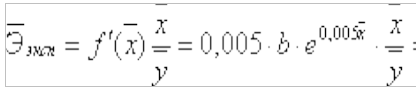

In [149]:
exp_elastic_coef = (
    0.005
    * b_exp
    * np.e ** (0.005 * data["Расходы"].mean())
    * data["Расходы"].mean()
    / data["Зарплата"].mean()
)
print(f"Коэффициент элластичности для экспоненциальной регресии: {exp_elastic_coef}")

Коэффициент элластичности для экспоненциальной регресии: 0.865256124720747


Изменение Расходов на 1% приводит к увеличению Зарплаты примерно на  0,8653%

#### Коэффициент эластичночти для гиперболической регрессии 
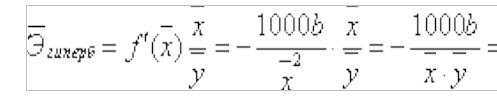

In [151]:
gip_elastic_coef = -1000 * b_gip / (data["Зарплата"].mean() * data["Расходы"].mean())
print(f"Коэффициент элластичности для гиперболической регресии: {gip_elastic_coef}")

Коэффициент элластичности для гиперболической регресии: 0.8791593120551203


Изменение Расходов на 1% приводит к увеличению Зарплаты примерно на  0,8792%

#### Коэффициент элластичности для линейной регрессии
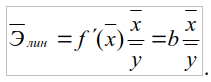

In [153]:
lin_elastic_coef = a_linear * data["Расходы"].mean() / data["Зарплата"].mean()
print(f"Коэффициент элластичности для линейной регресии: {lin_elastic_coef}")

Коэффициент элластичности для линейной регресии: 1.3440257131553373


Изменение Расходов на 1% приводит к увеличению Зарплаты примерно на  1,344%

### 5. Средняя ошибка аппроксимации вычисляется по формуле: 
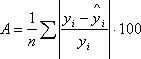

#### Средняя ошибка апроксимации для степенной регрессии

In [155]:
pow_aproxim_err = sum(
    abs((data["Зарплата"] - data["pow_reg"]) / (data["Зарплата"]) * 100)
) / len(data)
print(f"Средняя ошибка апроксимации для степенной регрессии: {pow_aproxim_err}")

Средняя ошибка апроксимации для степенной регрессии: 17.221245043264418


#### Средняя ошибка апроксимации для экспоненциальной регрессии

In [157]:
exp_aproxim_err = sum(
    abs((data["Зарплата"] - data["exp_reg"]) / (data["Зарплата"]) * 100)
) / len(data)
print(f"Средняя ошибка апроксимации для экспоненциальной регрессии: {exp_aproxim_err}")

Средняя ошибка апроксимации для экспоненциальной регрессии: 12.62516147574335


#### Средняя ошибка апроксимации для гиперболической регрессии

In [159]:
gip_aproxim_err = sum(
    abs((data["Зарплата"] - data["gip_reg"]) / (data["Зарплата"]) * 100)
) / len(data)
print(f"Средняя ошибка апроксимации для гиперболическойs регрессии: {gip_aproxim_err}")

Средняя ошибка апроксимации для гиперболическойs регрессии: 24.84820239292569


#### Средняя ошибка апроксимации для линейной регрессии

In [160]:
lin_aproxim_err = sum(
    abs((data["Зарплата"] - data["lin_reg"]) / (data["Зарплата"]) * 100)
) / len(data)
print(f"Средняя ошибка апроксимации для линейной регрессии: {lin_aproxim_err}")

Средняя ошибка апроксимации для линейной регрессии: 26.34000152970858


#### Вывод:
Анализ ошибок подтверждает что наиболее хорошо описывает данные экспоненциальная регрессия, так как имеет наименьшую ошибку.

### 6. Оцените статистическую надежность результатов регрессионного моделирования с помощью F-критерия Фишера. По значениям характеристик, рассчитанных в пп. 4, 5 и данном пункте, выберите лучшее уравнение регрессии и дайте его обоснование.
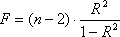

#### F-статистика для степенной регрессии

In [161]:
pow_f_stat = R_pow * (len(data) - 2) / (1 - R_pow)
print(f"F-статистика для степенной регрессии: {pow_f_stat}")

F-статистика для степенной регрессии: 13.890180653554678


#### F-статистика для экспоненциальной регрессии

In [162]:
exp_f_stat = R_exp * (len(data) - 2) / (1 - R_exp)
print(f"F-статистика для экспоненциальной регрессии: {exp_f_stat}")

F-статистика для экспоненциальной регрессии: 141.80288629654657


#### F-статистика для гиперболической регрессии

In [163]:
gip_f_stat = R_gip * (len(data) - 2) / (1 - R_gip)
print(f"F-статистика для гиперболической регрессии: {gip_f_stat}")

F-статистика для гиперболической регрессии: 6.735830993433057


#### F-статистика для линейной регрессии

In [164]:
lin_f_stat = R_lin * (len(data) - 2) / (1 - R_lin)
print(f"F-статистика для линейной регрессии: {lin_f_stat}")

F-статистика для линейной регрессии: 20.617055117674507


In [166]:
t_table = 4.75

Табличное распределения Фишера равно 4,75. Все модели значимые ???

Вывод о качестве моделей:
Оталкиваясь от того, что наименьшую ошибку апроксимации, а также наибольшое значение F-теста имеет экспоненциальная регрессия.

#### 7. Рассчитайте ожидаемое значение результата, если прогнозное значение фактора увеличится на 10% от его среднего уровня. Определите доверительный интервал прогноза для уровня значимости a=0,05.

#### Степенная регрессия

In [187]:
x_p = data["Расходы"].mean() + 10 * data["Расходы"].mean() / 100

In [188]:
y_p_pow = my_pow_regeression(x_p)
pow_std = np.sqrt(sum((data["Зарплата"] - y_p_pow) ** 2) / (len(data) - 1 - 1))
mean_pow_std_err = pow_std * math.sqrt(
    1
    + 1 / 1
    + (x_p - data["Расходы"].mean()) ** 2
    / sum((data["Расходы"] - data["Расходы"].mean()) ** 2)
)
pow_delta = t_table * mean_pow_std_err

In [189]:
print(
    f"Доверительный интервал при уровне значимости 0,05: {y_p_pow-pow_delta}<y_p*<{y_p_pow+pow_delta}"
)

Доверительный интервал при уровне значимости 0,05: -2983.682788319286<y_p*<5272.9827712966435


#### Экспоненциальная регрессия

In [190]:
y_p_exp = my_exp_regression(x_p)
exp_std = np.sqrt(sum((data["Зарплата"] - y_p_exp) ** 2) / (len(data) - 1 - 1))
mean_exp_std_err = exp_std * math.sqrt(
    1
    + 1 / 1
    + (x_p - data["Расходы"].mean()) ** 2
    / sum((data["Расходы"] - data["Расходы"].mean()) ** 2)
)
exp_delta = t_table * mean_exp_std_err

In [191]:
print(
    f"Доверительный интервал при уровне значимости 0,05: {y_p_exp-exp_delta}<y_p*<{y_p_exp+exp_delta}"
)

Доверительный интервал при уровне значимости 0,05: -3069.655522630322<y_p*<5170.524254059143


#### Гиперболическая регрессия

In [192]:
y_p_gip = my_gip_regression(x_p)
gip_std = np.sqrt(sum((data["Зарплата"] - y_p_gip) ** 2) / (len(data) - 1 - 1))
mean_gip_std_err = gip_std * math.sqrt(
    1
    + 1 / 1
    + (x_p - data["Расходы"].mean()) ** 2
    / sum((data["Расходы"] - data["Расходы"].mean()) ** 2)
)
gip_delta = t_table * mean_gip_std_err

In [193]:
print(
    f"Доверительный интервал при уровне значимости 0,05: {y_p_gip-gip_delta}<y_p*<{y_p_gip+gip_delta}"
)

Доверительный интервал при уровне значимости 0,05: -3048.55578139252<y_p*<5600.215827459557


#### Линейная регрессия

In [194]:
y_p_lin = my_linear_regression(x_p)
lin_std = np.sqrt(sum((data["Зарплата"] - y_p_lin) ** 2) / (len(data) - 1 - 1))
mean_lin_std_err = lin_std * math.sqrt(
    1
    + 1 / 1
    + (x_p - data["Расходы"].mean()) ** 2
    / sum((data["Расходы"] - data["Расходы"].mean()) ** 2)
)
lin_delta = t_table * mean_lin_std_err

In [195]:
print(
    f"Доверительный интервал при уровне значимости 0,05: {y_p_lin-lin_delta}<y_p*<{y_p_lin+lin_delta}"
)

Доверительный интервал при уровне значимости 0,05: -3008.2837964518812<y_p*<5482.901977021625


### Вывод

Лучше всего даннеы описывает экспоненциальная модель, так как она имеет наименьшую ошибку апроксимации, и наибольшое эмперическое значение F-теста. Также если посмотреть на наложение графика на точки, можно увидеть, что модель точно описывет данные.

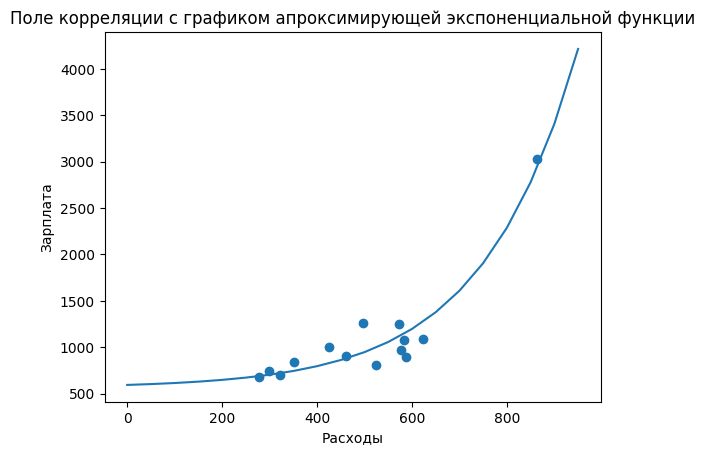

In [208]:
points = pd.Series([i for i in range(0, 1000, 50)])
plt.scatter(x=data["Расходы"], y=data["Зарплата"])
plt.plot(points, points.apply(my_exp_regression))
plt.xlabel("Расходы")
plt.ylabel("Зарплата")
plt.title("Поле корреляции с графиком апроксимирующей экспоненциальной функции")
plt.show()

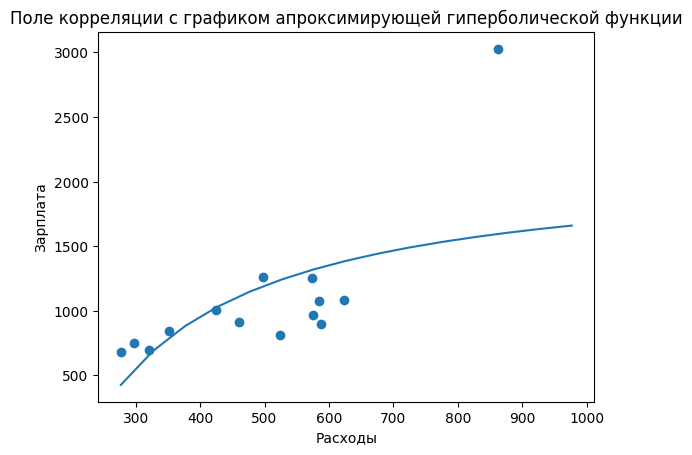

In [209]:
points = pd.Series([i for i in range(data["Расходы"].min(), 1000, 50)])
plt.scatter(x=data["Расходы"], y=data["Зарплата"])
plt.plot(points, points.apply(my_gip_regression))
plt.xlabel("Расходы")
plt.ylabel("Зарплата")
plt.title("Поле корреляции с графиком апроксимирующей гиперболической функции")
plt.show()

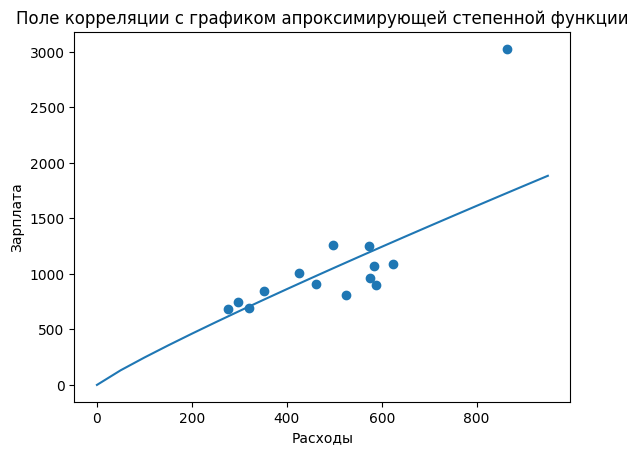

In [210]:
points = pd.Series([i for i in range(0, 1000, 50)])
plt.scatter(x=data["Расходы"], y=data["Зарплата"])
plt.plot(points, points.apply(my_pow_regeression))
plt.xlabel("Расходы")
plt.ylabel("Зарплата")
plt.title("Поле корреляции с графиком апроксимирующей степенной функции")
plt.show()

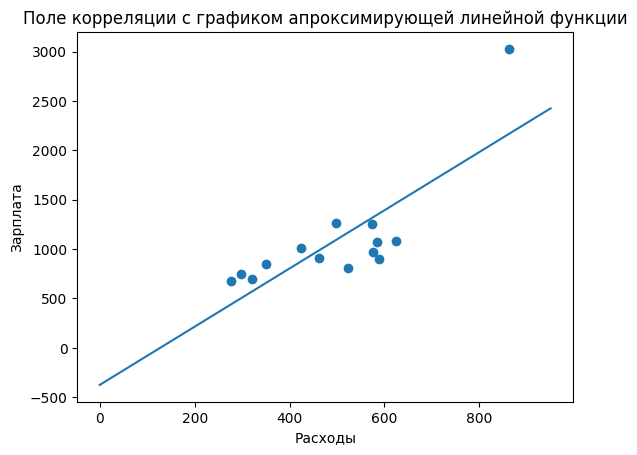

In [212]:
points = pd.Series([i for i in range(0, 1000, 50)])
plt.scatter(x=data["Расходы"], y=data["Зарплата"])
plt.plot(points, points.apply(my_linear_regression))
plt.xlabel("Расходы")
plt.ylabel("Зарплата")
plt.title("Поле корреляции с графиком апроксимирующей линейной функции")
plt.show()